# Pandas и Numpy

Датасеты:



*   [Starbucks Reviews](https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset)
*   [Restaurant Reviews](https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews)
* [LinkedIn Job Posting](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings)

Датасет про старбакс и отзывы на рестораны можно скачать [вот тут](https://drive.google.com/drive/folders/1Gb_QnXUSBOQpcqovj-KY7YfduxUzZbQD?usp=drive_link), если не хочется входить в аккаунт кеггла.<br>([Тут](https://www.kaggle.com/discussions/general/74235) есть инструкция-обсуждение о том, как соединить Kaggle и Colab.)


## ¿Вспоминаем? pandas

[Документация](https://pandas.pydata.org/docs/)

In [40]:
import pandas as pd

**Немного теории**

Основная сущность, с котрой работает библиотека - это датафрейм (`DataFrame`). На человеческом таблица. Каждый датафрейм состоит из столбцов типа `Series` (одномерных массивов, которые могут хранить значения любого типа данных).

Датафрейм можно получить различными способами, но основных два:

- создать из словаря, списка или чего-то похожего

In [41]:
dct = {
    'age': [12, 5, 15, 25],
    'height': [140, 110, 165, 180]
}
pd.DataFrame(dct)

,age,height
0,12,140
1,5,110
2,15,165
3,25,180


In [42]:
lst = [
    [12, 140],
    [5, 110],
    [15, 165],
    [25, 180]
]
pd.DataFrame(lst, columns=['age', 'height'])

,age,height
0,12,140
1,5,110
2,15,165
3,25,180


- загрузить из файла (csv, tsv, excel etc.)
    - **CSV**. Используется функция `read_csv()`. Аргумент `file` является строкой, в которой записан путь до файла с дата-сетом. Для записи данных из `DataFrame` в CSV-файл используется метод `to_csv(file)`.
    - **Excel**. Используется функция `read_excel()`. Для записи данных из `DataFrame` в Excel-файл используется метод `to_excel()`.
    - **JSON**. Используется функция `read_json()`. Для записи данных из DataFrame в JSON используется метод `to_json()`.
    - **Онлайн-таблицы** (на страницах сайта). Используется функция `read_html()`.


In [104]:
import requests
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.6 Safari/605.1.15'}
site = 'https://en.wikipedia.org/wiki/List_of_glossing_abbreviations'

response = requests.get(site, headers=headers)
df_glosses = pd.read_html(response.content)[1]
df_glosses.head()

,Conventional Gloss,Variants,Meaning,Reference
0,NaN,-A,"athematic (TAMA athematic tense-aspect-mood, A...",[43]
1,NaN,A-,associating (prefix on case abbreviation),[24]
2,NaN,AA,addressee authority (cf. SA),[21]
3,NaN,AB,from. May be equivalent to ABESS or ABL. Compo...,[citation needed]
4,NaN,"AB, ABV[citation needed]",above deictic center,[44]


In [44]:
df = pd.read_csv("Restaurant reviews.csv")

У таблицы есть строки и столбцы, к ним можно обращаться отдельно или чтобы выделить конкретный набор данных по условию.

Посмотрим, как выглядит таблица (число в скобках - сколько вы хотите увидеть первых строк; по умолчанию равно 5):

In [45]:
df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN


Можно смотреть не верхние строки, а случайные или нижние:

In [46]:
df.sample(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
6411,Hyderabad Chefs,Vishnu S,Ambience was quite simple like a Cafe and the ...,3,"69 Reviews , 178 Followers",9/25/2018 22:13,2,NaN
4573,Owm Nom Nom,Sai Krishna,💝,5,0 Reviews,7/25/2018 21:11,0,NaN


In [47]:
df.tail(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6,NaN


Можно узнать размер таблицы:

In [48]:
df.shape # это кортеж, можно взять элемент по индексу

(10000, 8)

Или, например, набор ее столбцов:

In [49]:
df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', '7514'],
      dtype='object')

Попробуем выбрать конкретные части датафрейма

- столбец

In [50]:
df['Reviewer'].head(3)

# или вот так, но работает только с названиями, соответсвующими требованиям к
# названиям атрибутов
# df.Reviewer.head(3)

,Reviewer
0,Rusha Chakraborty
1,Anusha Tirumalaneedi
2,Ashok Shekhawat


* столбцы

In [51]:
df[['Reviewer', 'Review', 'Rating']].head(3)

,Reviewer,Review,Rating
0,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5
1,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5
2,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5


Еще столбец можно взять с помощью метода `.loc`, но про него ниже вместе со строками.

- строка.

In [52]:
df.iloc[10]  # именно 10-я стока таблицы

,10
Restaurant,Beyond Flavours
Reviewer,Saubhagya Bhuyan
Review,The service was great and the food was awesome...
Rating,5
Metadata,"1 Review , 1 Follower"
Time,5/22/2019 22:22
Pictures,0
7514,NaN


In [53]:
df.loc[10]  # стока таблицы с индексом 10

,10
Restaurant,Beyond Flavours
Reviewer,Saubhagya Bhuyan
Review,The service was great and the food was awesome...
Rating,5
Metadata,"1 Review , 1 Follower"
Time,5/22/2019 22:22
Pictures,0
7514,NaN


Казалось, бы `loc` и `iloc` очень похожи, однако если iloc работает именно с целым числом - номером строки (есть еще нюансы, но про них лучше в документации почитать), то loc - с индексом строки, который в общем случае может быть и строковым типом и даже числом с плавающей точкой или логической переменной.

А еще с помощью `loc` можно вот так:

In [54]:
df.loc[5:10, 'Rating':'Metadata']

,Rating,Metadata
5,5,1 Review
6,5,1 Review
7,4,1 Review
8,5,"1 Review , 1 Follower"
9,5,"1 Review , 1 Follower"
10,5,"1 Review , 1 Follower"


И даже вот так

In [55]:
df.loc[df.Restaurant == 'Beyond Flavours',
 ['Restaurant', 'Rating', 'Metadata']].head(3)

,Restaurant,Rating,Metadata
0,Beyond Flavours,5,"1 Review , 2 Followers"
1,Beyond Flavours,5,"3 Reviews , 2 Followers"
2,Beyond Flavours,5,"2 Reviews , 3 Followers"


С помощью одного метода мы смогли вытощить нужные нам строки и столбцы. И здесь видно еще одно отличие `loc` и `iloc`: в первом случае обе границы диапазона будут включены при срезе. А с `iloc` - нет, там все как у списков:

In [56]:
df.iloc[5:10]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0,NaN
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0,NaN
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0,NaN
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0,NaN
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0,NaN


В целом, логика фильтрации в пандасе достаточно мощная, хотя и "многословная". Например, мы можем выделить отзывы о B-Dubs или Paradise, которые дали люди с именем на N.

In [57]:
df[(df.Restaurant.isin(['B-Dubs', 'Paradise'])) & (df["Reviewer"].str.startswith('N'))]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
132,Paradise,Nitesh,Awesome biryani and kebabs. Apollo fish is the...,5,0 Reviews,5/22/2019 22:55,0,NaN
140,Paradise,Noor Mohammed Zubair,Taste: there was huge hype about biryani hence...,3,"45 Reviews , 48 Followers",5/22/2019 12:46,0,NaN
168,Paradise,Nikhil Reddy,Gud food..fast service.. best people in the re...,4,"1 Review , 1 Follower",5/15/2019 20:22,0,NaN
191,Paradise,N Bharath Kumar Goud,Paradise is one my favourite restaurants to ea...,4,1 Review,5/11/2019 17:31,0,NaN
2214,B-Dubs,Nikhil Raj,Was my first visit and it was awesome experien...,5,"1 Review , 2 Followers",5/14/2019 23:39,0,NaN
2224,B-Dubs,Nrusimha Akundy,Polite and friendly and service is awesome and...,5,"1 Review , 14 Followers",5/8/2019 23:28,0,NaN
2232,B-Dubs,NAGUBANDI ANOOP 14BEC0308,The party was great...the food was awesome and...,5,1 Review,5/8/2019 22:51,0,NaN
2266,B-Dubs,Nishanth Bhan,Fantastic place to watch ipl. Great wings. Fan...,5,"1 Review , 16 Followers",4/21/2019 22:11,1,NaN


Для связи отдельных условий могут использоваться `&` (и), `|` (или), `^` (либо) или `~` (не)

Колонки и строки можно добавлять и удалять достаточно легко. Вот у нас есть какая-то странная колонка 7514 — явно ошибка в данных. Удалим ее:

In [58]:
df = df.drop("7514", axis="columns")  # axis=1 / axis="columns" отвечает за столбцы

# или вот так
# df = df.drop(columns=['7514'])

df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0


Теперь давайте добавим колонку, в которой будет True, если картинок больше нуля, и False - если меньше

In [59]:
df['Pics_exist'] = df.Pictures > 0
df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Pics_exist
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,False
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,False


Еще мы можем получать всякую статистику по нашим данным.
- Как часто встречаются разные рестораны (спойлер - датасет идеален с этой точки зрения, всех ресторанов поровну)


In [60]:
df.Restaurant.value_counts()

# или так, что более универсально, так как можно по нескольким колонкам считать
# df.value_counts('Restaurant')

,count
Restaurant,
Beyond Flavours,100
Paradise,100
Flechazo,100
Shah Ghouse Hotel & Restaurant,100
Over The Moon Brew Company,100
...,...
Desi Bytes,100
Hyderabadi Daawat,100
Zega - Sheraton Hyderabad Hotel,100


- Нет ли у нас пропущенных значений в колонках?

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
 7   Pics_exist  10000 non-null  bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 556.8+ KB


Есть, но немного. Если они нам мешают, то их можно удалить:

In [62]:
df = df.dropna()
# у dropna() есть аргумент how, которому можно, например, сообщать значение all,
# если мы хотим удалять только совсем пустые
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
 7   Pics_exist  9955 non-null   bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 631.9+ KB


Выше можно увидеть, что у колонок бывают разные типы. Самый общий - это тип `object`, с ним не работает никакая математика, чаще всего он содержит строки или какие-то пользовательские объекты.

Заметим, что колонка Rating почему-то тоже `object`, хотя должна быть `int64`, как Pictures. Попробуем это поправить:

In [63]:
df["Rating"] = pd.to_numeric(df["Rating"])

ValueError: Unable to parse string "Like" at position 7597

Упало :(

Попробуем посмотреть, что там вообoе встречается:

In [64]:
df["Rating"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

Много всякой ерунды и все строковый тип данных. Давайте напишем функцию, которая поможет нам с этим справиться, и применим ее к столбцу:

In [65]:
def rating_to_num(rating):
  if rating == "Like":
    return 5
  else:
    return round(float(rating))

# или то же самое лямбдой
# df["Rating"].apply(lambda rating: 5 if rating == "Like" else round(float(rating)))

df["Rating"] = df["Rating"].apply(rating_to_num)
df["Rating"].value_counts()

,count
Rating,
5,3827
4,2489
1,1735
3,1192
2,712


Теперь мы можем посмотреть всякие статистики по столбцу с рейтингом:

In [66]:
df.describe()

,Rating,Pictures
count,9955.000000,9955.000000
mean,3.598795,0.751984
std,1.482589,2.575691
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


И порисовать графики:

<Axes: ylabel='Frequency'>

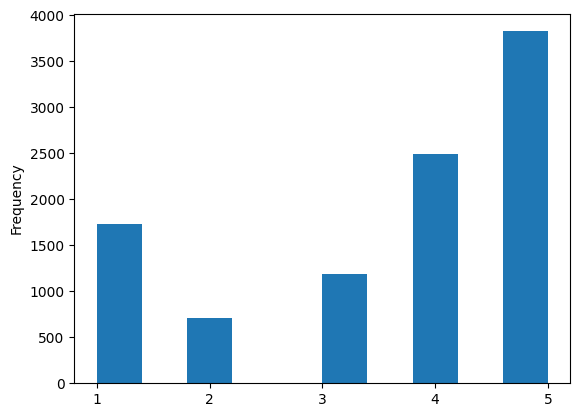

In [69]:
df["Rating"].plot(kind="hist", xticks=[1, 2, 3, 4, 5])

Но сейчас мы все замеряем по всем ресторанам в целом. Давайте сгруппируем по названию ресторана:

In [72]:
df.groupby(by = "Restaurant").head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Pics_exist
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,False
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,False
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,False
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,False
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,False
...,...,...,...,...,...,...,...,...
9900,Chinese Pavilion,Khan,Starting off with food...They have amazing and...,5,1 Review,5/13/2019 12:05,0,False
9901,Chinese Pavilion,Diaryofmuna,I had ordered Manchow Soup. The taste was very...,3,"27 Reviews , 10 Followers",5/8/2019 15:02,8,True
9902,Chinese Pavilion,Himanshu Chhabra,"It is overrated casual Chinese food, with lot ...",1,"5 Reviews , 52 Followers",5/5/2019 22:59,0,False
9903,Chinese Pavilion,Arun Prasad,Overrated place. It's a disappointment and bel...,2,"5 Reviews , 41 Followers",4/28/2019 20:37,0,False


Можем собирать все в списки

In [70]:
df.groupby(by="Restaurant").agg(list).head(3)

,Reviewer,Review,Rating,Metadata,Time,Pictures,Pics_exist
Restaurant,,,,,,,
10 Downing Street,"[Smrati Saxena, Jayaprakash Reddy, Ram K, Shru...",[I've been to this place about two times and i...,"[3, 4, 4, 5, 4, 4, 1, 1, 1, 4, 4, 4, 4, 5, 3, ...","[18 Reviews , 41 Followers, 2 Reviews , 11 Fol...","[5/23/2019 21:04, 5/21/2019 16:00, 5/19/2019 1...","[0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 2, 0, 1, 0, ...","[False, False, False, False, False, True, Fals..."
13 Dhaba,"[Sarika, Ankur, Kumar Ajay, Henna Mittal, Yoge...",[I didn't go and eat at the Dhaba.\nI had orde...,"[4, 5, 5, 1, 5, 1, 1, 5, 3, 4, 3, 5, 1, 1, 5, ...","[34 Reviews , 12 Followers, 0 Reviews, 1 Revie...","[5/25/2019 15:05, 5/25/2019 13:03, 5/19/2019 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."
"3B's - Buddies, Bar & Barbecue","[Kairamkonda Saikiran, Saiswapnil, Naveen, K P...",[We go their for a team dinner.The name of the...,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1 Review , 3 Followers, 1 Review , 2 Follower...","[5/23/2019 23:39, 5/23/2019 23:21, 5/23/2019 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal..."


Можем сразу посчитать среднее. `numeric_only=True` позволяет избежать ситуации, когда пандас пытается считать среднее по списку строк и падает с ошибкой, закономерно не справившись с этой задачей

In [73]:
df.groupby(by="Restaurant").mean(numeric_only=True).head(3)

,Rating,Pictures,Pics_exist
Restaurant,,,
10 Downing Street,3.80,1.05,0.24
13 Dhaba,3.48,0.41,0.19
"3B's - Buddies, Bar & Barbecue",4.76,0.13,0.07


Можно заодно еще минимум, максимум и стандартное отклонение

In [74]:
df.groupby(by="Restaurant").agg({"Rating": ["mean", "min", "max", "std"]}).head(3)

Rating                  
                                 mean min max       std
Restaurant                                             
10 Downing Street                3.80   1   5  1.091751
13 Dhaba                         3.48   1   5  1.566570
3B's - Buddies, Bar & Barbecue   4.76   1   5  0.830237

Или задать разные способы агреггации для разных колонок

In [75]:
df.groupby("Restaurant").agg(
    {
        "Rating": lambda x: x.mean(),
        "Review": lambda x: list(x)
    }
).head(3)

,Rating,Review
Restaurant,,
10 Downing Street,3.80,[I've been to this place about two times and i...
13 Dhaba,3.48,[I didn't go and eat at the Dhaba.\nI had orde...
"3B's - Buddies, Bar & Barbecue",4.76,[We go their for a team dinner.The name of the...


А как отсортировать по среднему рейтингу?

In [79]:
df.groupby(by="Restaurant").mean(numeric_only=True).sort_values(by="Rating", # в sort_values также можно передавать списки
                                                                ascending=False)

,Rating,Pictures,Pics_exist
Restaurant,,,
AB's - Absolute Barbecues,4.88,0.24,0.07
B-Dubs,4.81,0.16,0.11
"3B's - Buddies, Bar & Barbecue",4.76,0.13,0.07
Paradise,4.70,0.02,0.02
Flechazo,4.66,0.55,0.14
...,...,...,...
Behrouz Biryani,2.82,0.36,0.23
Mathura Vilas,2.82,0.31,0.16
Pakwaan Grand,2.71,0.17,0.10


### Упражнения

У вас есть еще `reviews_data.csv`. Попробуйте исследовать эти данные, как можно меньше подглядывая в решения выше.

У LinkedIn Job Posting более сложная структура. Можно посмотреть только основной `posting.csv`, а можно изучить еще и дополнительные файлы.

### Где еще взять задания, если не хватило?
* [*100 заданий*](https://github.com/ajcr/100-pandas-puzzles)
* [*тетрадки по темам*](https://github.com/guipsamora/pandas_exercises)

## Numpy
[Документация](https://numpy.org/doc/stable/)

In [80]:
import numpy as np

В numpy тоже есть основная сущность - массив. Его проще всего создавать из списка чисел или посредством генераторов из самой библиотеки.

In [82]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [83]:
np.ones((3, 5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [84]:
np.array([
    [1, 4, 7],
    [2, 0, 5]
])

array([[1, 4, 7],
       [2, 0, 5]])

Вообще, с помощью numpy можно реализовать любые матричные вычисления, которые вам могут понадобиться. Например, есть формула косинусной близости:

$$ similarity = \cos(\theta) = \frac{A \times B}{\| A \| \times \| B \|} = \frac{\sum_{i=1}^{n} A_i \times B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \times \sqrt{\sum_{i=1}^{n} B_i^2}} $$

Сама косинусная близость будет часто требоваться вам дальше при работе с текстами, но руками вы ее считать (или даже кодить) будете редко. Потому что есть готовая функция

In [85]:
from scipy.spatial.distance import cosine

In [86]:
a = np.array([1, 3, 2])
b = np.array([0, 1, 0])

1 - cosine(a, b) # потому что в scipy эта функция считает расстояние

np.float64(0.8017837257372732)

А еще мы можем написать это руками:

In [87]:
np.dot(a, b) / (np.sqrt(np.sum(a ** 2)) * np.sqrt(np.sum(b ** 2)))

np.float64(0.8017837257372732)

- `np.dot` - реализует матричное умножение, `a * b` - поэлементное

In [88]:
a * b == np.dot(a, b)

array([False,  True, False])

Аналогично для матриц

`matrix.T` - транспонирование матрицы

In [89]:
a1 = np.array([
    [1, 4, 7],
    [2, 0, 5]
])
a1 * a1

array([[ 1, 16, 49],
       [ 4,  0, 25]])

In [91]:
a1 * a1.T

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

In [92]:
np.dot(a1, a1.T)

array([[66, 37],
       [37, 29]])

In [93]:
np.dot(a1, a1)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

- `np.sqrt` - вычисляет квадратный корень
- `np.sum` - вычислчет сумму

Чтобы собрать вектора в матрицу можно использовать функцию hstack, vstack или concatenate

In [94]:
np.hstack([a, b])

array([1, 3, 2, 0, 1, 0])

In [95]:
np.concatenate([a, b])

array([1, 3, 2, 0, 1, 0])

In [96]:
np.vstack([a, b])

array([[1, 3, 2],
       [0, 1, 0]])

### Где взять задания?
* [*100 заданий*](https://github.com/rougier/numpy-100)
* [*задания на Kaggle*](https://www.kaggle.com/code/themlphdstudent/learn-numpy-numpy-50-exercises-and-solution)